In [1]:
#importing all the libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score
from sklearn.utils import resample
import warnings
# Ignore the specific FutureWarning globally
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn.cluster._kmeans")
# Code where you want to suppress warnings
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
from sklearn.mixture import GaussianMixture    
from collections import Counter
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import classification_report


In [2]:
df=pd.read_csv('mcdonalds.csv')
df.head(5)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [4]:
data=df.drop(['Like','Age','VisitFrequency','Gender'],axis=1)
data.head(5)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No


In [5]:
# Create an instance of LabelEncoder
label_encoder = LabelEncoder()
# Fit the LabelEncoder to the data and transform the data
#yes=1,no=0
for col in data.columns:   
    data[col]= label_encoder.fit_transform(data[col])
data.head(5)    

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0


In [6]:
#mean value for columns
column_means = np.round(np.mean(data, axis=0), 2)
column_means

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64

In [7]:
temp=data
n_components=11
# Initialize the PCA model with the number of components you want  
pca = PCA(n_components=n_components)
# Fit the PCA model to your data
pca.fit(data)
# Transform your data into the reduced dimension space
data_pca = pca.transform(temp)
std_dev = np.sqrt(pca.explained_variance_)

# Get the proportion of variance explained by each component
prop_of_variance = pca.explained_variance_ratio_

# Get the cumulative proportion of variance explained
cumulative_prop = np.cumsum(prop_of_variance)
print('Importance of components:')
# Print the results
for i in range(n_components):
    print('PC',i+1)
    print(f"Standard Deviation: {std_dev[i]:.4f}")
    print(f"Proportion of Variance: {prop_of_variance[i]:.4f}")
    print(f"Cumulative Proportion: {cumulative_prop[i]:.4f}")
    print()

Importance of components:
PC 1
Standard Deviation: 0.7570
Proportion of Variance: 0.2994
Cumulative Proportion: 0.2994

PC 2
Standard Deviation: 0.6075
Proportion of Variance: 0.1928
Cumulative Proportion: 0.4922

PC 3
Standard Deviation: 0.5046
Proportion of Variance: 0.1330
Cumulative Proportion: 0.6253

PC 4
Standard Deviation: 0.3988
Proportion of Variance: 0.0831
Cumulative Proportion: 0.7084

PC 5
Standard Deviation: 0.3374
Proportion of Variance: 0.0595
Cumulative Proportion: 0.7679

PC 6
Standard Deviation: 0.3103
Proportion of Variance: 0.0503
Cumulative Proportion: 0.8182

PC 7
Standard Deviation: 0.2897
Proportion of Variance: 0.0438
Cumulative Proportion: 0.8620

PC 8
Standard Deviation: 0.2751
Proportion of Variance: 0.0395
Cumulative Proportion: 0.9016

PC 9
Standard Deviation: 0.2653
Proportion of Variance: 0.0368
Cumulative Proportion: 0.9383

PC 10
Standard Deviation: 0.2488
Proportion of Variance: 0.0324
Cumulative Proportion: 0.9707

PC 11
Standard Deviation: 0.2369


In [8]:
matrix=pca.components_
for i in range(n_components):
    print('PC',i+1)
    
    print(f"Standard Deviation: {std_dev[i]:.1f}")

PC 1
Standard Deviation: 0.8
PC 2
Standard Deviation: 0.6
PC 3
Standard Deviation: 0.5
PC 4
Standard Deviation: 0.4
PC 5
Standard Deviation: 0.3
PC 6
Standard Deviation: 0.3
PC 7
Standard Deviation: 0.3
PC 8
Standard Deviation: 0.3
PC 9
Standard Deviation: 0.3
PC 10
Standard Deviation: 0.2
PC 11
Standard Deviation: 0.2


In [9]:
column_labels = ["PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7", "PC8", "PC9", "PC10", "PC11"]
#storing the columns names in a list
row_labels=[col for col in data.columns]
#converting data to row wise
data_arrays=[[row[i] for row in matrix] for i in range(len(matrix[0]))]
#storing data in data frame
de = pd.DataFrame(data_arrays, columns=column_labels, index=row_labels)

# Print the DataFrame
print(de)


                 PC1       PC2       PC3       PC4       PC5       PC6  \
yummy      -0.476933  0.363790 -0.304444  0.055162 -0.307535  0.170738   
convenient -0.155332  0.016414 -0.062515 -0.142425  0.277608 -0.347830   
spicy      -0.006356  0.018809 -0.037019  0.197619  0.070620 -0.355087   
fattening   0.116232 -0.034094 -0.322359 -0.354139 -0.073405 -0.406515   
greasy      0.304443 -0.063839 -0.802373  0.253960  0.361399  0.209347   
fast       -0.108493 -0.086972 -0.064642 -0.097363  0.107930 -0.594632   
cheap      -0.337186 -0.610633 -0.149310  0.118958 -0.128973 -0.103241   
tasty      -0.471514  0.307318 -0.287265 -0.002547 -0.210899 -0.076914   
expensive   0.329042  0.601286  0.024397  0.067816 -0.003125 -0.261342   
healthy    -0.213711  0.076593  0.192051  0.763488  0.287846 -0.178226   
disgusting  0.374753 -0.139656 -0.088571  0.369539 -0.729209 -0.210878   

                 PC7       PC8       PC9      PC10      PC11  
yummy      -0.280519  0.013041  0.572403 -0.1102

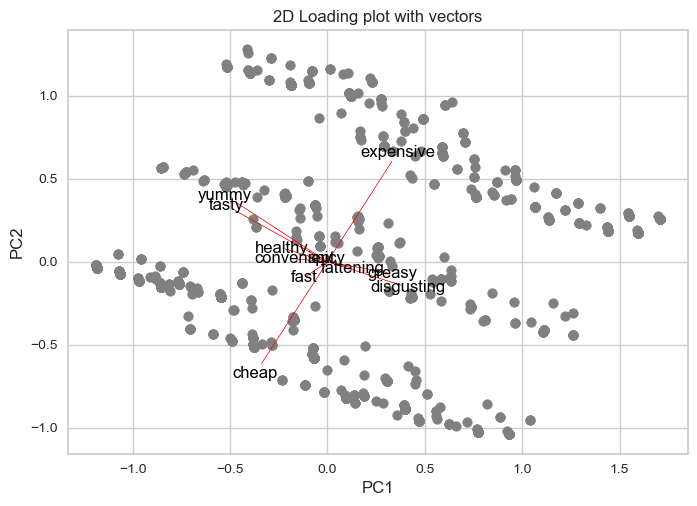

In [10]:
#stroring data for 11 columns
MD_x = df.iloc[:, 0:11].values

MD_x = (MD_x == "Yes").astype(int)
# assuming MD_x is the matrix of binary data from the previous question
MD_pca = PCA()
MD_pca.fit(MD_x)
loadings = matrix[:2, :]
plt.scatter(MD_pca.transform(MD_x)[:, 0], MD_pca.transform(MD_x)[:, 1], c='grey')
for i, v in enumerate(df.columns[:11]):
    plt.arrow(0, 0, loadings[0,i], loadings[1,i], color='red', alpha=0.8)
    plt.text(loadings[0,i]* 1.1, loadings[1,i] * 1.1, v, color='black', ha='center', va='center')
 
plt.xlabel('PC1')
plt.ylabel('PC2')
 
# Show plot
plt.title('2D Loading plot with vectors')
plt.show()

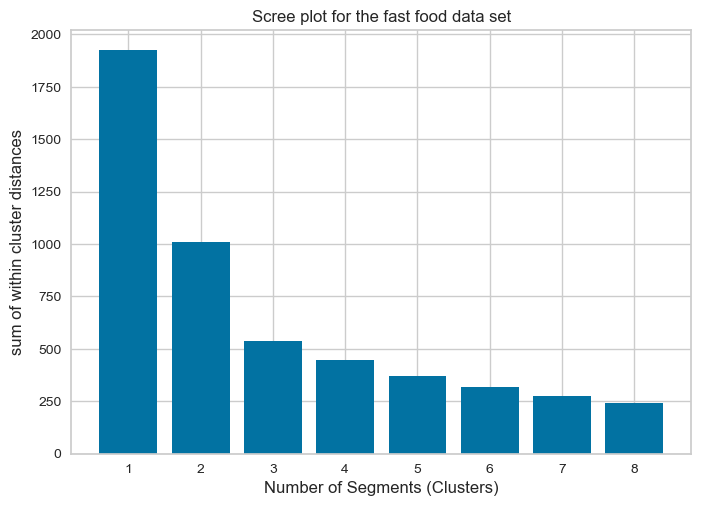

In [11]:
# Generate sample data (replace this with your own data)
temp, _ = make_blobs(n_samples=300, centers=3, random_state=0, cluster_std=1.0)

# Define a range of cluster numbers to explore
cluster_numbers = range(1, 9)
inertia_values = []

  
# Perform K-means clustering for different numbers of clusters
for k in cluster_numbers:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(temp)
    inertia_values.append(kmeans.inertia_)

# Create the plot
plt.bar(cluster_numbers, inertia_values)
plt.xlabel('Number of Segments (Clusters)')
plt.ylabel('sum of within cluster distances')
plt.title('Scree plot for the fast food data set')
plt.show()


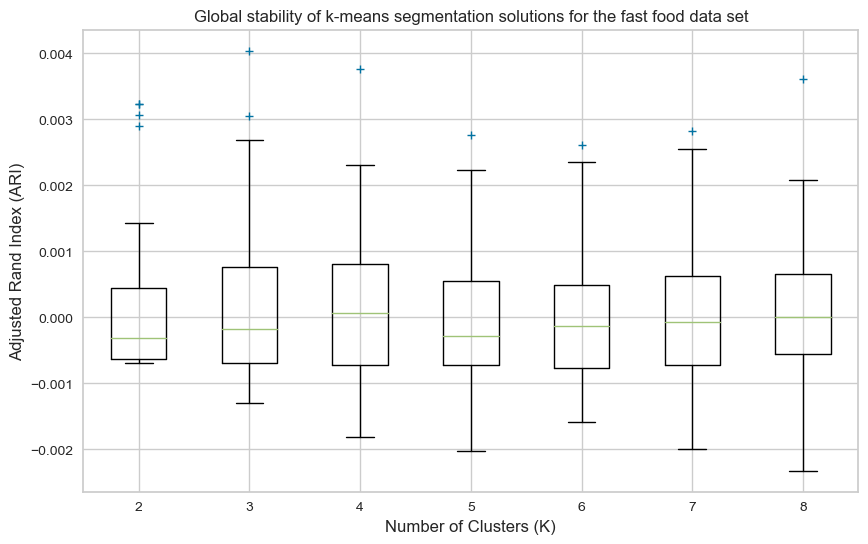

In [12]:
temp2=data
# Generate sample data (replace this with your own data)
temp2, _ = make_blobs(n_samples=1453, centers=3, random_state=0, cluster_std=5.0)

# Number of bootstrap resamples
nboot = 100

# Number of cluster numbers to consider
cluster_numbers = range(2, 9)

# Initialize an empty array to store adjusted Rand index values
ari_values = np.zeros((len(cluster_numbers), nboot))

# Perform bootstrapping and clustering for each cluster number
for i, k in enumerate(cluster_numbers):
    for j in range(nboot):
        # Resample the data with replacement
        boot_data = resample(temp2, random_state=j)

        # Fit K-means to the bootstrapped data
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(boot_data)
        boot_labels = kmeans.labels_

        # Compute the adjusted Rand index between true labels and bootstrapped labels
        true_labels = np.random.choice(k, size=len(boot_data))
        ari = adjusted_rand_score(true_labels, boot_labels)

        # Store the adjusted Rand index value
        ari_values[i, j] = ari

# Create a global stability boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(ari_values.T, labels=[str(k) for k in cluster_numbers], sym='b+')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Adjusted Rand Index (ARI)')
plt.title('Global stability of k-means segmentation solutions for the fast food data set')
plt.show()


Best Number of Clusters (BIC): 7
Best Number of Clusters (ICL): 3
Best Number of Clusters (AIC): 7


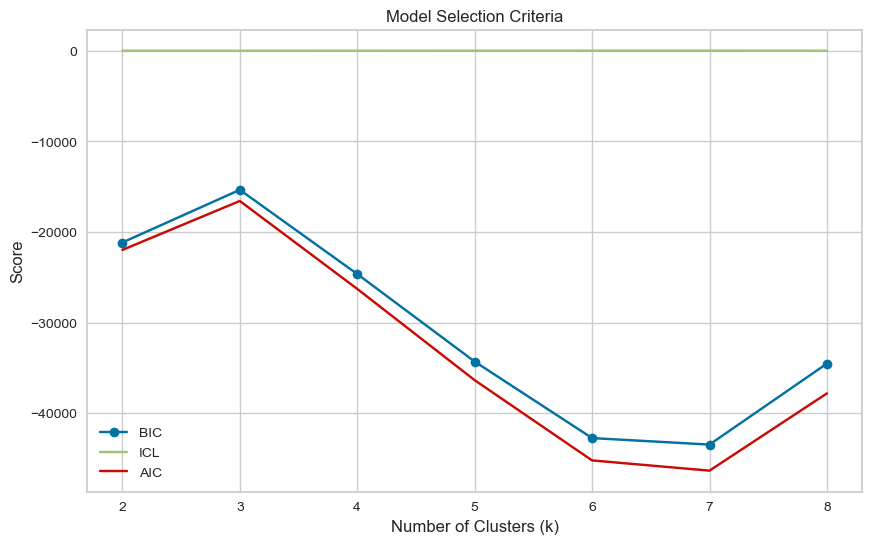

In [13]:
# Define the range of cluster numbers to consider
k_values = range(2, 9)
temp3=data
# Initialize empty lists to store results
bic_scores = []
icl_scores = []
aic_scores = []

# Loop through different cluster numbers and fit models
for k in k_values:
    model = GaussianMixture(k)
    model.fit(temp3)
    bic_score = model.bic(temp3)
    icl_score = model.score(temp3)  # ICL is often the log-likelihood value
    aic_score = model.aic(temp3)
    # Calculate BIC, ICL, and AIC scores for the model
    #bic_score = diagnostic.BIC(data, model)
    #icl_score = diagnostic.ICL(data, model)
    #aic_score = diagnostic.AIC(data, model)

    bic_scores.append(bic_score)
    icl_scores.append(icl_score)
    aic_scores.append(aic_score)

# Choose the best number of clusters based on the lowest scores
best_k_bic = k_values[np.argmin(bic_scores)]
best_k_icl = k_values[np.argmin(icl_scores)]
best_k_aic = k_values[np.argmin(aic_scores)]

print(f"Best Number of Clusters (BIC): {best_k_bic}")
print(f"Best Number of Clusters (ICL): {best_k_icl}")
print(f"Best Number of Clusters (AIC): {best_k_aic}")

# You can also plot the scores to visualize the results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(k_values, bic_scores, label='BIC', marker='o')
plt.plot(k_values, icl_scores, label='ICL', marker='+')
plt.plot(k_values, aic_scores, label='AIC', marker='x')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Score')
plt.title('Model Selection Criteria')
plt.legend()
plt.grid(True)
plt.show()


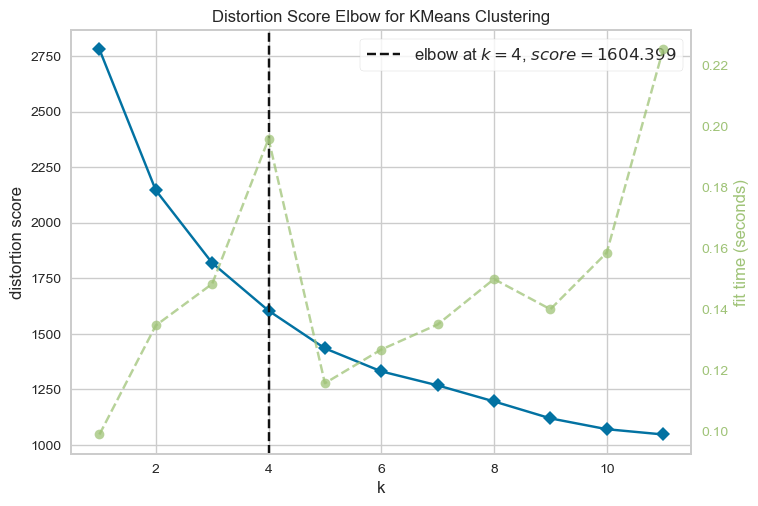

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [14]:
#for viewing the perfect cluster using elbow method
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(temp3)
visualizer.show()

In [15]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(temp3)
temp3['cluster_num'] = kmeans.labels_
print ('Labels',kmeans.labels_) 
print ('Inertia',kmeans.inertia_)  
print('Iteration',kmeans.n_iter_) 
print('Centres',kmeans.cluster_centers_)

Labels [1 2 2 ... 2 3 0]
Inertia 1603.3394119101072
Iteration 7
Centres [[0.02057613 0.67489712 0.08230453 0.91769547 0.70781893 0.74897119
  0.06584362 0.09465021 0.89300412 0.0617284  0.72427984]
 [0.02272727 0.89285714 0.07467532 0.92532468 0.66233766 0.9512987
  0.92207792 0.1525974  0.01298701 0.07142857 0.38311688]
 [0.85227273 0.96875    0.12784091 0.90625    0.5625     0.86363636
  0.10511364 0.92613636 0.82670455 0.19034091 0.09943182]
 [0.89272727 0.98       0.08727273 0.78727273 0.34727273 0.96181818
  0.96909091 0.98181818 0.01454545 0.33636364 0.04363636]]


In [16]:
Counter(kmeans.labels_)

Counter({1: 308, 2: 352, 3: 550, 0: 243})

In [17]:
#pre processing the data
df['Like']= df['Like'].replace({'I hate it!-5': '-5','I love it!+5':'+5'})

In [18]:
#labeling the data
def labelling(x):
    df[x] = LabelEncoder().fit_transform(df[x])
    return df

cat = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting']

for i in cat:
    labelling(i)
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,-5,47,Once a year,Male
1449,1,1,0,1,0,0,1,1,0,1,0,+2,36,Once a week,Female
1450,1,1,0,1,0,1,0,1,1,0,0,+3,52,Once a month,Female
1451,1,1,0,0,0,1,1,1,0,1,0,+4,41,Every three months,Male


In [19]:
#storing the cluster
df['cluster_num']=temp3['cluster_num']
#getting dummies
mcd_data=pd.get_dummies(df, prefix=['cluster_num'], columns=['cluster_num'])
mcd_data.head(4)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,cluster_num_0,cluster_num_1,cluster_num_2,cluster_num_3
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female,0,0,1,0
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female,0,0,1,0
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female,0,0,0,1


In [20]:
#checking cluster like wise
crosstab =pd.crosstab(df['cluster_num'],df['Like'])
crosstab = crosstab[['-5','-4','-3','-2','-1','0','+1','+2','+3','+4','+5']]
crosstab 

Like,-5,-4,-3,-2,-1,0,+1,+2,+3,+4,+5
cluster_num,,,,,,,,,,,
0,89,27,31,18,13,37,13,7,8,0,0
1,54,36,34,29,25,53,32,31,12,2,0
2,5,4,6,6,10,37,47,64,74,52,47
3,4,4,2,6,10,42,60,85,135,106,96


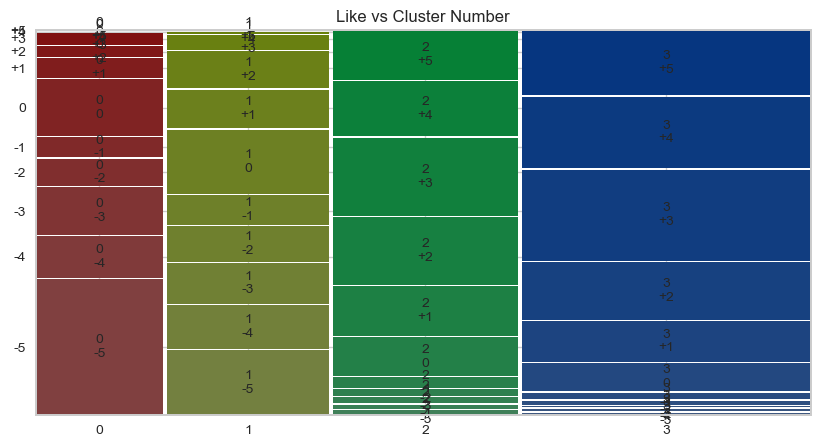

In [21]:
#like clasiffication by cluster
plt.rcParams['figure.figsize'] = (10,5)
mosaic(crosstab.stack(),title='Like vs Cluster Number')
plt.show()

In [22]:
crosstab_gender =pd.crosstab(df['cluster_num'],df['Gender'].replace({1: 'Male', 0: 'Female'}))
crosstab_gender

Gender,Female,Male
cluster_num,,
0,101,142
1,183,125
2,173,179
3,331,219


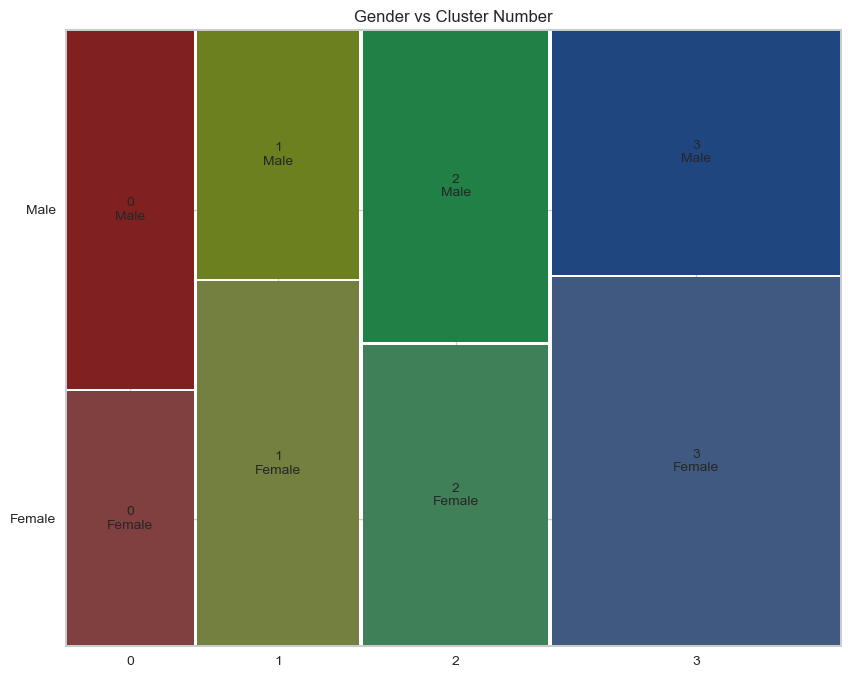

In [23]:
#gender clasification by cluster
plt.rcParams['figure.figsize'] = (7,5)
fig, ax = plt.subplots(figsize=(10, 8))
mosaic(crosstab_gender.stack(), ax=ax, title='Gender vs Cluster Number')
plt.show()

<Axes: xlabel='cluster_num', ylabel='Age'>

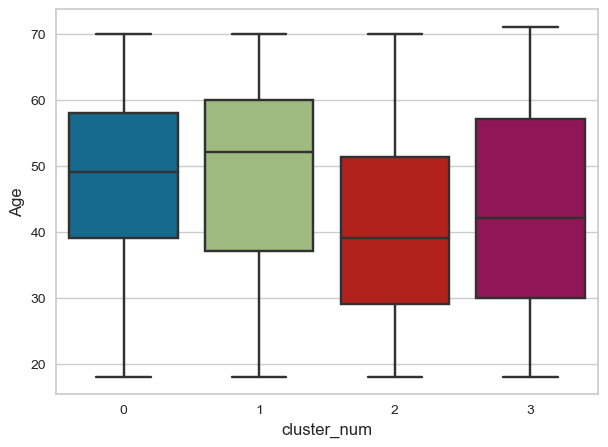

In [24]:
#viewing age vs cluster box plot
sns.boxplot(x="cluster_num", y="Age", data=df)

In [25]:
#groupby visitfrequency.mean() and cluster
df['VisitFrequency'] = LabelEncoder().fit_transform(df['VisitFrequency'])
visit = df.groupby('cluster_num')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()
visit

,cluster_num,VisitFrequency
0,0,2.683128
1,1,2.818182
2,2,2.522727
3,3,2.590909


In [26]:
#groupby like.mean() and cluster
df['Like'] = LabelEncoder().fit_transform(df['Like'])
Like = df.groupby('cluster_num')['Like'].mean()
Like = Like.to_frame().reset_index()
Like

,cluster_num,Like
0,0,7.407407
1,1,6.175325
2,2,3.213068
3,3,2.990909


In [27]:
##groupby gender.mean() and cluster
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
Gender = df.groupby('cluster_num')['Gender'].mean()
Gender = Gender.to_frame().reset_index()
Gender

,cluster_num,Gender
0,0,0.584362
1,1,0.405844
2,2,0.508523
3,3,0.398182


In [28]:
segment = Gender.merge(Like, on='cluster_num', how='left').merge(visit, on='cluster_num', how='left')
segment

,cluster_num,Gender,Like,VisitFrequency
0,0,0.584362,7.407407,2.683128
1,1,0.405844,6.175325,2.818182
2,2,0.508523,3.213068,2.522727
3,3,0.398182,2.990909,2.590909


In [29]:
#scaling the data
df1=data
scalar=StandardScaler()
scaled_df = scalar.fit_transform(df1)

pca = PCA(n_components=11)
principal_components = pca.fit_transform(scaled_df)
pca_df = pd.DataFrame(data=principal_components ,columns=["PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9","PCA10","PCA11"])
pca_df.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11
0,1.073259,-0.445638,0.347751,-0.887637,-1.445629,0.536377,0.095003,-0.676870,0.303102,0.316698,1.697762
1,-0.558843,0.373723,-1.569882,-0.006790,0.226200,-0.483141,0.006757,0.432153,0.278925,0.197152,1.471295
2,0.150662,1.712577,-0.271137,3.353533,-1.300572,0.185123,-0.486435,-0.659672,1.270899,-1.271435,-0.136035
3,-0.711050,-1.128279,-1.157733,0.484542,1.229215,-0.885636,0.015457,0.404556,-1.571951,0.092091,-0.234094
4,0.434430,-1.411875,0.889554,0.464288,-0.570202,-0.911944,-1.797396,-0.700232,1.573188,0.088668,-0.034919


/var/folders/7z/mhf08_y15t99454ffzfh9ksw0000gn/T/ipykernel_4316/3238245648.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=pca_df, x="PCA1", y="PCA2", palette="deep")


<Axes: xlabel='PCA1', ylabel='PCA2'>

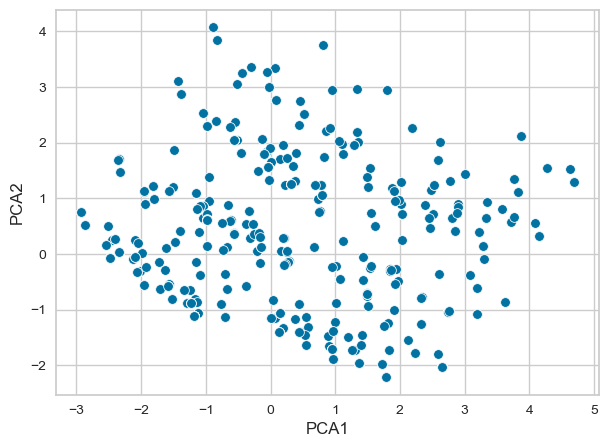

In [30]:
sns.scatterplot(data=pca_df, x="PCA1", y="PCA2", palette="deep")

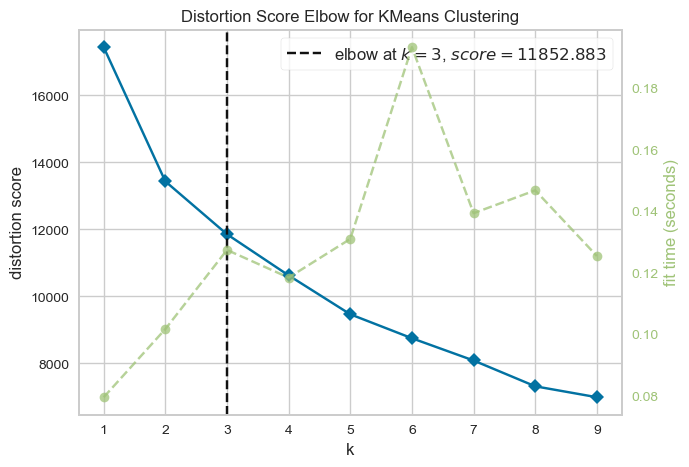

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [31]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(scaled_df)       
visualizer.show() 

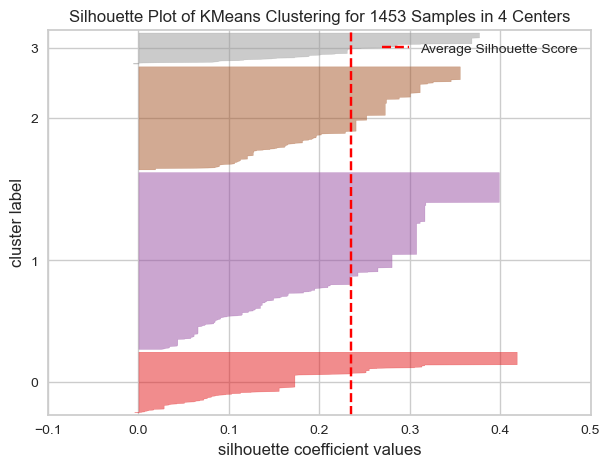

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 1453 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [32]:
model = KMeans(4)
visualizer = SilhouetteVisualizer(model)
visualizer.fit(scaled_df)
visualizer.show()

In [33]:
kmeans_model=KMeans(4)
kmeans_model.fit_predict(scaled_df)
pca_df_kmeans= pd.concat([pca_df,pd.DataFrame({'cluster':kmeans_model.labels_})],axis=1)
pca_df_kmeans.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,cluster
0,1.073259,-0.445638,0.347751,-0.887637,-1.445629,0.536377,0.095003,-0.676870,0.303102,0.316698,1.697762,2
1,-0.558843,0.373723,-1.569882,-0.006790,0.226200,-0.483141,0.006757,0.432153,0.278925,0.197152,1.471295,1
2,0.150662,1.712577,-0.271137,3.353533,-1.300572,0.185123,-0.486435,-0.659672,1.270899,-1.271435,-0.136035,1
3,-0.711050,-1.128279,-1.157733,0.484542,1.229215,-0.885636,0.015457,0.404556,-1.571951,0.092091,-0.234094,3
4,0.434430,-1.411875,0.889554,0.464288,-0.570202,-0.911944,-1.797396,-0.700232,1.573188,0.088668,-0.034919,2


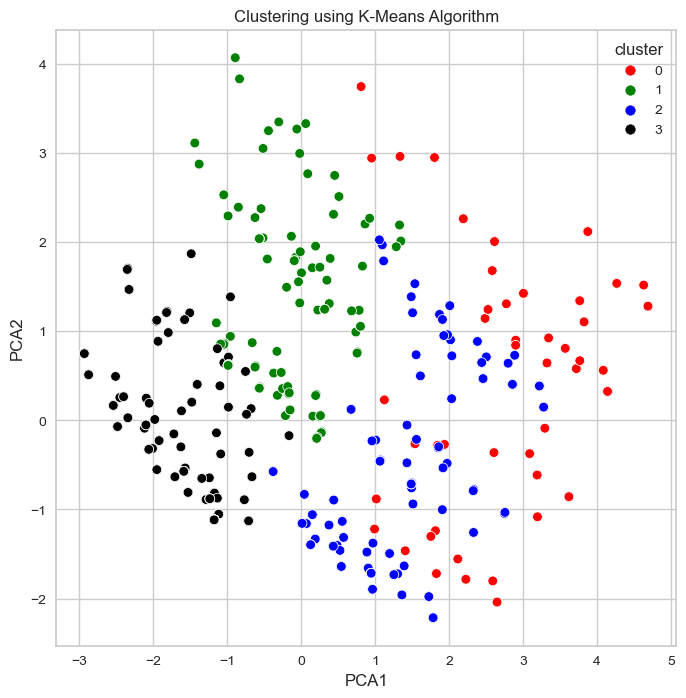

In [34]:
plt.figure(figsize=(8,8))
ax=sns.scatterplot(x="PCA1",y="PCA2",hue="cluster",data=pca_df_kmeans,palette=['red','green','blue','black'])
plt.title("Clustering using K-Means Algorithm")
plt.show()

In [35]:
kmeans_model=KMeans(4)
kmeans_model.fit_predict(scaled_df)
pca_df_kmeans1= pd.concat([df1,pd.DataFrame({'cluster':kmeans_model.labels_})],axis=1)
pca_df_kmeans1.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,cluster_num,cluster
0,0,1,0,1,0,1,1,0,1,0,0,1,3
1,1,1,0,1,1,1,1,1,1,0,0,2,0
2,0,1,1,1,1,1,0,1,1,1,0,2,0
3,1,1,0,1,1,1,1,1,0,0,1,3,2
4,0,1,0,1,1,1,1,0,0,1,0,1,3


<Axes: xlabel='cluster', ylabel='count'>

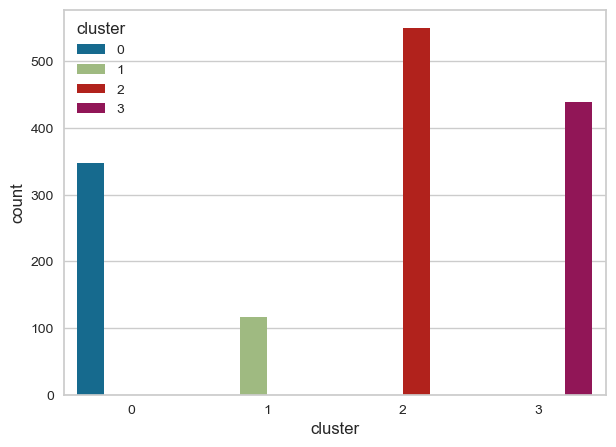

In [36]:
#cluster count
sns.countplot(x ='cluster', data = pca_df_kmeans1,hue = "cluster")

In [37]:
#cluster is zero
cluster_1_df = pca_df_kmeans1[pca_df_kmeans1["cluster"]==0]
cluster_1_df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,cluster_num,cluster
1,1,1,0,1,1,1,1,1,1,0,0,2,0
2,0,1,1,1,1,1,0,1,1,1,0,2,0
6,1,1,1,1,0,1,0,1,1,1,0,2,0
9,1,1,0,1,1,1,0,1,1,0,0,2,0
11,1,1,0,1,1,1,0,1,1,0,1,2,0


In [38]:
#cluster is 1
cluster_2_df = pca_df_kmeans1[pca_df_kmeans1["cluster"]==1]
cluster_2_df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,cluster_num,cluster
8,0,0,0,1,1,0,0,0,1,0,1,0,1
18,0,0,0,1,1,1,1,0,1,0,1,0,1
38,0,0,0,1,1,1,1,0,0,0,1,1,1
39,0,0,0,1,1,1,0,0,1,0,1,0,1
40,1,0,0,1,0,0,0,1,1,0,0,2,1


In [39]:
#cluster is 2
cluster_3_df = pca_df_kmeans1[pca_df_kmeans1["cluster"]==2]
cluster_3_df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,cluster_num,cluster
3,1,1,0,1,1,1,1,1,0,0,1,3,2
5,1,1,0,1,0,1,1,1,0,0,0,3,2
7,1,1,0,1,1,1,1,1,0,0,0,3,2
15,1,1,0,1,0,1,1,1,0,0,0,3,2
16,1,1,0,1,1,1,1,1,0,0,0,3,2


In [40]:
#cluster is 3
cluster_4_df = pca_df_kmeans1[pca_df_kmeans1["cluster"]==3]
cluster_4_df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,cluster_num,cluster
0,0,1,0,1,0,1,1,0,1,0,0,1,3
4,0,1,0,1,1,1,1,0,0,1,0,1,3
10,0,1,0,1,0,1,1,0,0,0,1,1,3
12,0,1,0,1,0,1,1,0,0,0,0,1,3
14,0,1,0,1,0,1,0,0,1,0,0,0,3


In [41]:
df_new= pd.concat([df,pd.DataFrame({'cluster':kmeans_model.labels_})],axis=1)
df_new.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,cluster_num,cluster
0,0,1,0,1,0,1,1,0,1,0,0,7,61,0,0,1,3
1,1,1,0,1,1,1,1,1,1,0,0,1,51,0,0,2,0
2,0,1,1,1,1,1,0,1,1,1,0,0,62,0,0,2,0
3,1,1,0,1,1,1,1,1,0,0,1,3,69,4,0,3,2
4,0,1,0,1,1,1,1,0,0,1,0,1,49,3,1,1,3


In [42]:
df_new['VisitFrequency'].value_counts()

3    439
0    342
5    252
4    235
2    131
1     54
Name: VisitFrequency, dtype: int64

In [43]:
df_new["VisitFrequency"]= df_new["VisitFrequency"].replace({'Never':0, 'Once a year':1, 'Every three months':2, 'Once a month':3, 'Once a week':4, 'More than once a week':5})
df_new['Like'].value_counts()

2     229
1     187
10    169
3     160
0     152
9     152
4     143
7      73
8      71
6      59
5      58
Name: Like, dtype: int64

In [44]:
df_new['Gender'].value_counts()

0    788
1    665
Name: Gender, dtype: int64

In [45]:
#preprocessing the data
df_new["Like"]= df_new["Like"].replace({'I hate it!-5':0, '-4':1, '-3':2, '-2':3, '-1':4, '0':5, '+1':6, '+2':7, '+3':8, '+4':9, 'I love it!+5':10})
df_new["Gender"]= df_new["Gender"].replace({'Female':0, 'Male':1})
df_new

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,cluster_num,cluster
0,0,1,0,1,0,1,1,0,1,0,0,7,61,0,0,1,3
1,1,1,0,1,1,1,1,1,1,0,0,1,51,0,0,2,0
2,0,1,1,1,1,1,0,1,1,1,0,0,62,0,0,2,0
3,1,1,0,1,1,1,1,1,0,0,1,3,69,4,0,3,2
4,0,1,0,1,1,1,1,0,0,1,0,1,49,3,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,9,47,5,1,0,3
1449,1,1,0,1,0,0,1,1,0,1,0,1,36,4,0,3,2
1450,1,1,0,1,0,1,0,1,1,0,0,2,52,3,0,2,0
1451,1,1,0,0,0,1,1,1,0,1,0,3,41,0,1,3,2


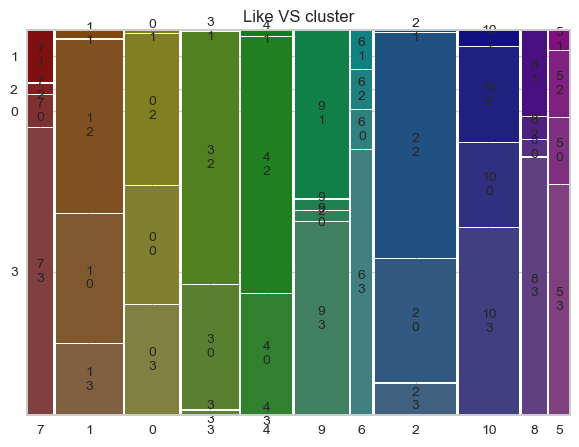

In [46]:
mosaic(df_new, ['Like','cluster'],title='Like VS cluster')
plt.show()

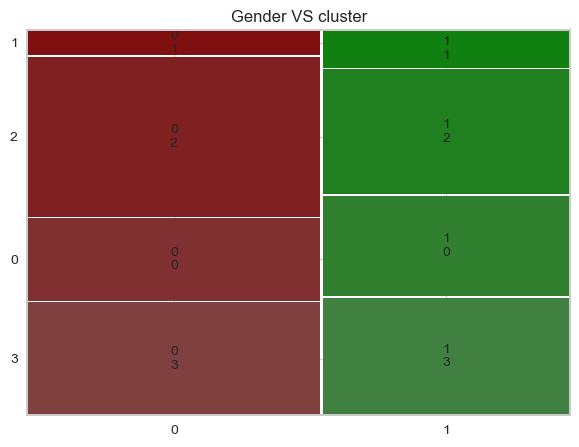

In [47]:
mosaic(df_new, ['Gender','cluster'],title='Gender VS cluster')
plt.show()

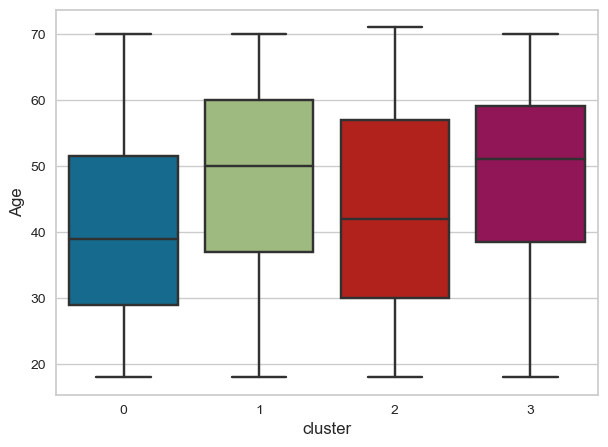

In [48]:
#age vs cluster graph
sns.boxplot(x=df_new['cluster'], y=df_new['Age'])
plt.show()

In [49]:
X = df_new.drop(['cluster'],axis=1)
y= df_new[['cluster']]
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3)

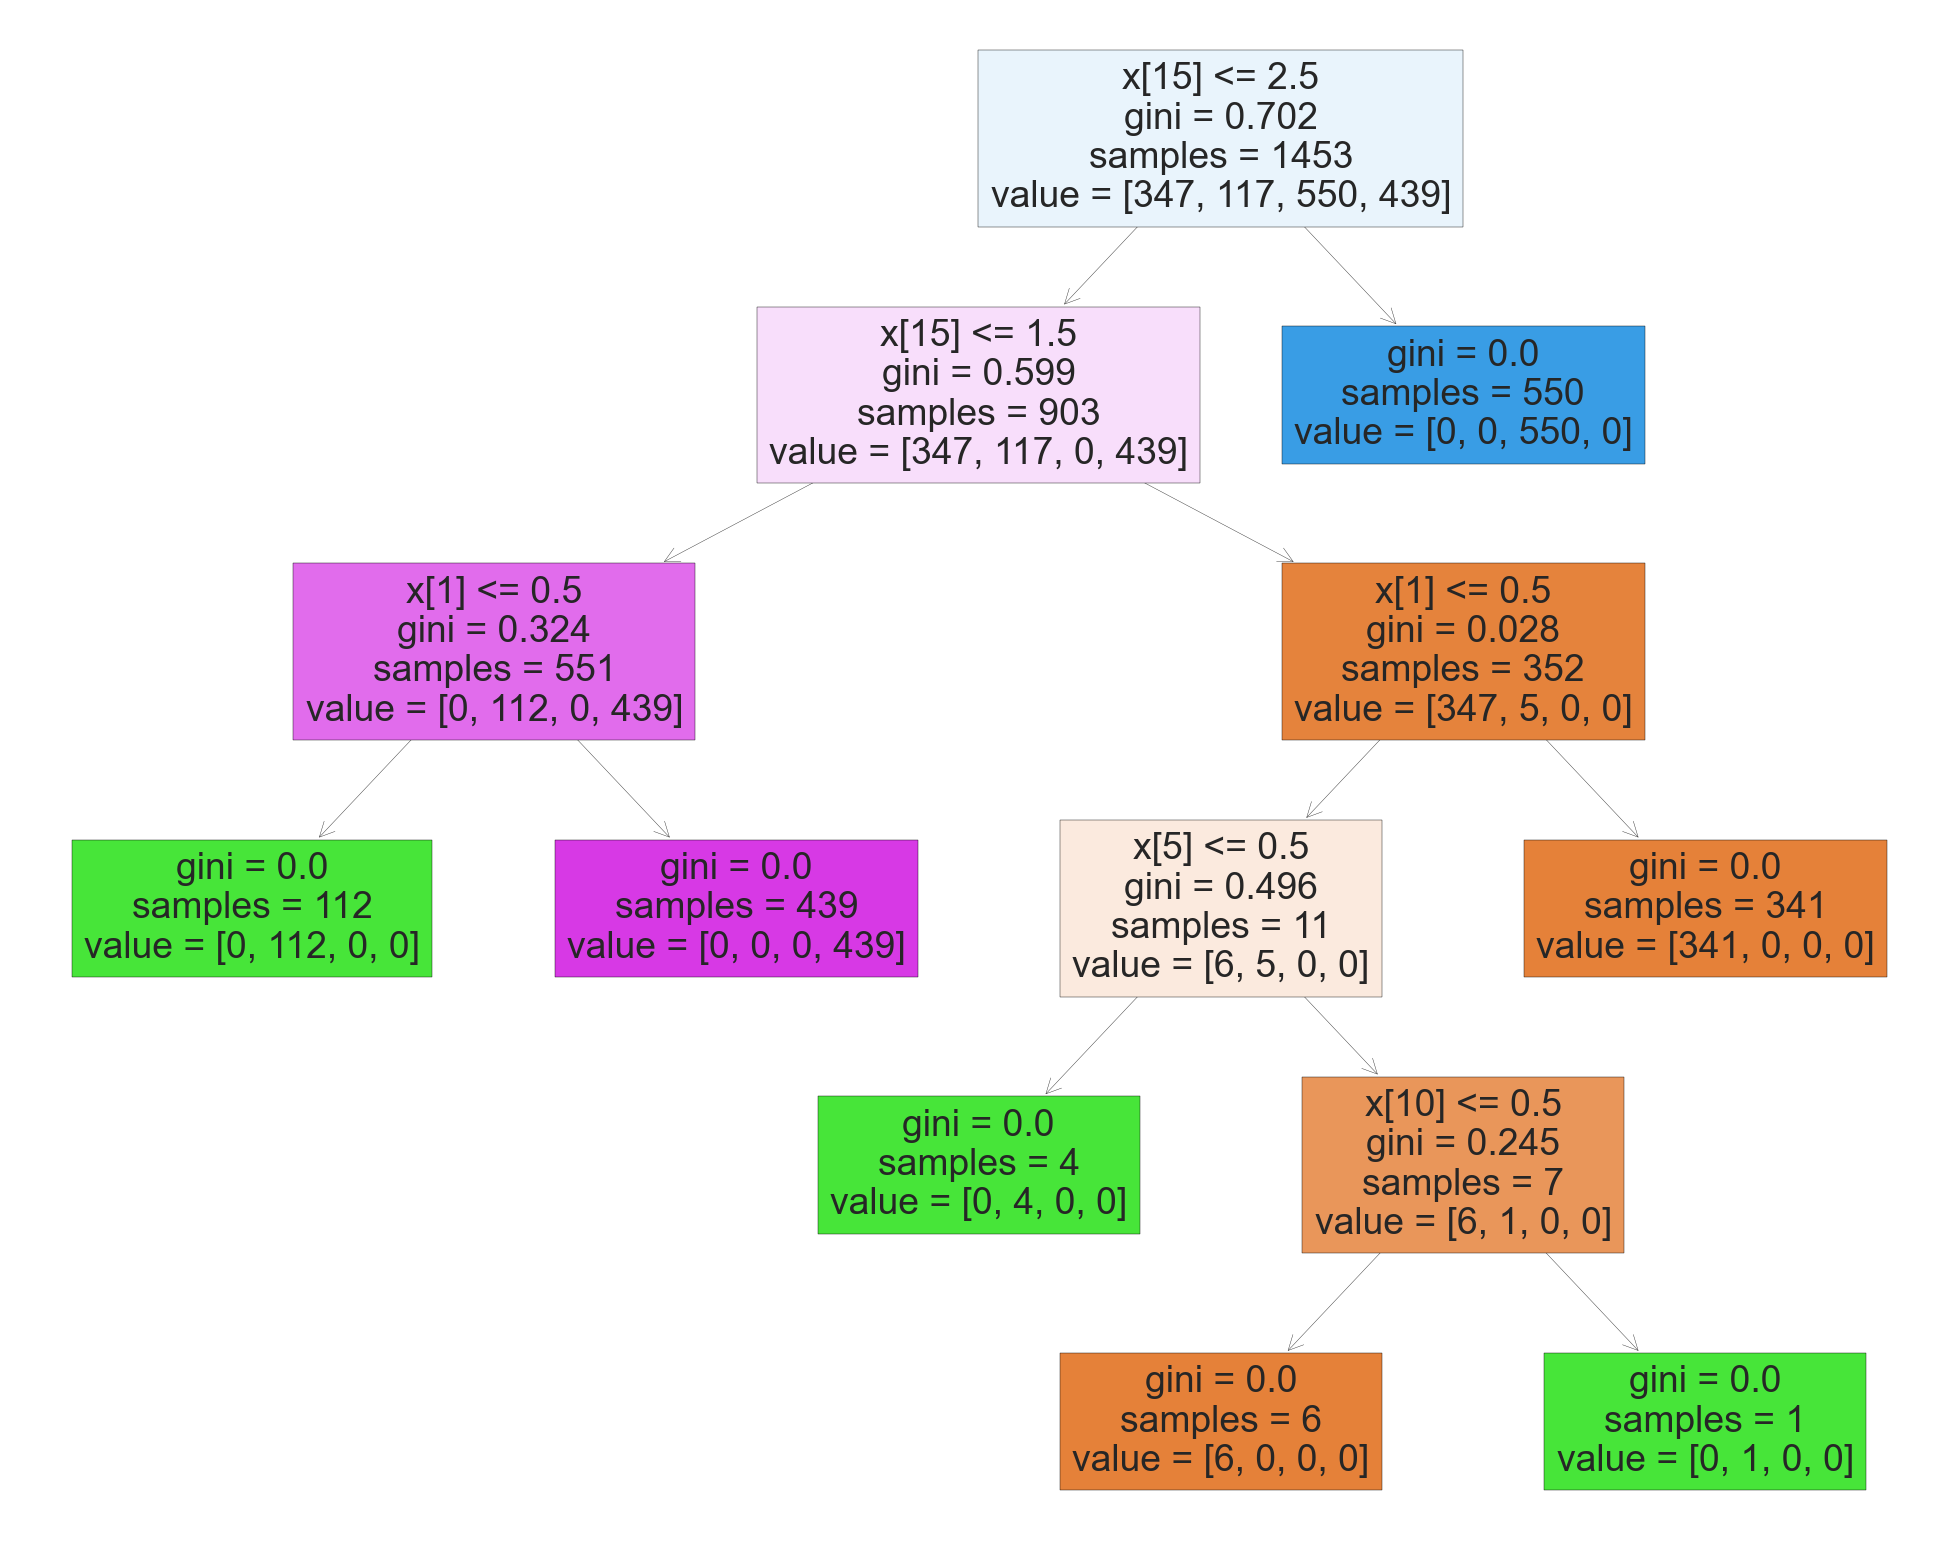

In [50]:
clf = DecisionTreeClassifier(random_state=1234)
model = clf.fit(X, y)
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf,   filled=True)

In [51]:
model= DecisionTreeClassifier(criterion="entropy")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(metrics.confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[105   0   0   0]
 [  0  32   0   0]
 [  0   0 157   0]
 [  0   0   0 142]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00        32
           2       1.00      1.00      1.00       157
           3       1.00      1.00      1.00       142

    accuracy                           1.00       436
   macro avg       1.00      1.00      1.00       436
weighted avg       1.00      1.00      1.00       436



In [52]:
import pickle
filename = 'model.pkl'
pickle.dump(model, open(filename, 'wb'))
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result,'% Acuuracy')

1.0 % Acuuracy
